# Customer Segmentation Project

 - Author: Mohammad Usman Khan
 - Profiles:
      -  Kaggle: [Mohammad Usman Khan](https://www.kaggle.com/usmank7)
      - LinkedIn: [Mohammad Usman Khan](https://www.linkedin.com/in/usmank7)
      - GitHub: [Mohammad Usman Khan](https://github.com/usmank77)

In [20]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [21]:
# Load the dataset
data = pd.read_csv("Mall_Customers.csv")

In [22]:
# Inspect the data
print("\n--- Dataset Information ---")
print(data.info())

print("\n--- First 5 Rows ---")
print(data.head())

print("\n--- Last 5 Rows ---")
print(data.tail())


--- Dataset Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None

--- First 5 Rows ---
   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [23]:
# Select relevant features for clustering
X = data[["Annual Income (k$)", "Spending Score (1-100)"]]

In [24]:
# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

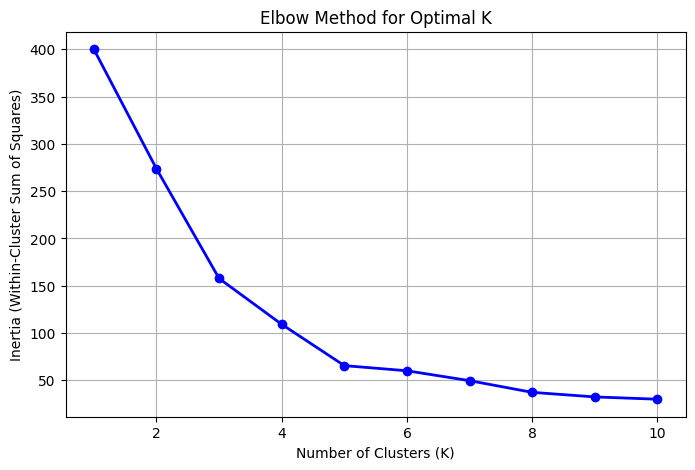

In [25]:
# Finding the optimal number of clusters using Elbow Method
inertia = []
K = range(1, 11)

for k in K:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X_scaled)
    inertia.append(model.inertia_)

# elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-', linewidth=2)
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (Within-Cluster Sum of Squares)")
plt.grid(True)
plt.show()

In [26]:
# Apply K-Means with the chosen number of clusters (e.g., K=5)
kmeans = KMeans(n_clusters=5, random_state=42)
data["Cluster"] = kmeans.fit_predict(X_scaled)

In [27]:
# Inspect the clustered data
print("\n--- Clustered Data Sample ---")
print(data.head())

print("\nCluster Counts:")
print(data["Cluster"].value_counts())


--- Clustered Data Sample ---
   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        4  
1        2  
2        4  
3        2  
4        4  

Cluster Counts:
Cluster
0    81
1    39
3    35
4    23
2    22
Name: count, dtype: int64


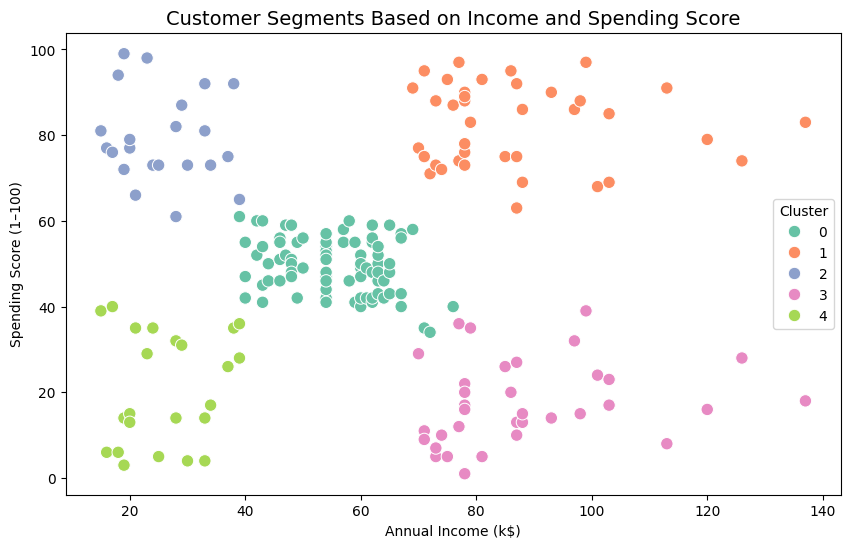

In [28]:
# Visualize the clusters in 2D
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=data["Annual Income (k$)"],
    y=data["Spending Score (1-100)"],
    hue=data["Cluster"],
    palette="Set2",
    s=80)

plt.title("Customer Segments Based on Income and Spending Score", fontsize=14)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1–100)")
plt.legend(title="Cluster")
plt.show()

In [29]:
# Analyze each cluster’s characteristics
cluster_summary = data.groupby("Cluster")[["Annual Income (k$)", "Spending Score (1-100)"]].mean()
print("\n--- Cluster Summary ---")
print(cluster_summary)


--- Cluster Summary ---
         Annual Income (k$)  Spending Score (1-100)
Cluster                                            
0                 55.296296               49.518519
1                 86.538462               82.128205
2                 25.727273               79.363636
3                 88.200000               17.114286
4                 26.304348               20.913043
